In [0]:
import pandas as pd
import pulp as p 
import itertools as it

In [0]:

def get_paths(origin_node, target_node, node_to_nodes):
    return simple_paths(target_node,
                        [origin_node],
                        set(origin_node),
                        node_to_nodes,
                        list())
  
def simple_paths(target_node,
                 current_path,
                 used_nodes,
                 node_to_nodes,
                 answer_paths):
    last_node = current_path[-1]
    if last_node == target_node:
        answer_paths.append(list(current_path))
    else:
        for neighbor in node_to_nodes[last_node]:
            if neighbor not in used_nodes:
                current_path.append(neighbor)
                used_nodes.add(neighbor)
                simple_paths(target_node,
                             current_path,
                             used_nodes,
                             node_to_nodes,
                             answer_paths)
                used_nodes.remove(neighbor)
                current_path.pop()
    return answer_paths

In [28]:

node_to_nodes = dict()
node_to_nodes['C1'] = ['C2', 'C3']
node_to_nodes['C2'] = ['C1', 'C3', 'C4']
node_to_nodes['C3'] = ['C1', 'C2', 'C4', 'C5']
node_to_nodes['C4'] = ['C2', 'C3', 'C5', 'C6']
node_to_nodes['C5'] = ['C3', 'C4', 'C6']
node_to_nodes['C6'] = ['C4', 'C5']
paths = get_paths('C1', 'C6', node_to_nodes)

new_paths = list()
for i in paths:
  if len(p)==len(set(i)):
    new_paths.append(i)

for i in new_paths:
  print(i)

TypeError: ignored

In [0]:
logistic_costs = dict()
logistic_costs['12'] = [6, 7]
logistic_costs['13'] = [3, 2]
logistic_costs['23'] = [2, 3]
logistic_costs['24'] = [5, 8]
logistic_costs['34'] = [3, 8]
logistic_costs['35'] = [4, 3]
logistic_costs['45'] = [4, 5]
logistic_costs['46'] = [6, 3]
logistic_costs['56'] = [5, 9]

In [30]:
prod_df = pd.DataFrame(columns=['road', 'product', 'shipment1', 'shipment2', 'max_load'])

prod_df.loc[0] = ['12', 'Product 1', 1, 1, 20]
prod_df.loc[1] = ['12', 'Product 2', 2, 3, 6]
prod_df.loc[2] = ['13', 'Product 1', 1, 1, 10]
prod_df.loc[3] = ['13', 'Product 2', 2, 3, 6]
prod_df.loc[4] = ['23', 'Product 1', 1, 1, 40]
prod_df.loc[5] = ['23', 'Product 2', 3, 8, 12]
prod_df.loc[6] = ['24', 'Product 1', 1, 1, 15]
prod_df.loc[7] = ['24', 'Product 2', 5, 2, 10]
prod_df.loc[8] = ['34', 'Product 1', 1, 1, 5]
prod_df.loc[9] = ['34', 'Product 2', 5, 10, 15]
prod_df.loc[10] = ['35', 'Product 1', 1, 1, 20]
prod_df.loc[11] = ['35', 'Product 2', 4, 2, 8]
prod_df.loc[12] = ['45', 'Product 1', 1, 1, 5]
prod_df.loc[13] = ['45', 'Product 2', 2, 3, 6]
prod_df.loc[14] = ['46', 'Product 1', 1, 1, 10]
prod_df.loc[15] = ['46', 'Product 2', 6, 3, 9]
prod_df.loc[16] = ['56', 'Product 1', 1, 1, 5]
prod_df.loc[17] = ['56', 'Product 2', 4, 2, 8]

prod_df.head(10)

,road,product,shipment1,shipment2,max_load
0,12,Product 1,1,1,20
1,12,Product 2,2,3,6
2,13,Product 1,1,1,10
3,13,Product 2,2,3,6
4,23,Product 1,1,1,40
5,23,Product 2,3,8,12
6,24,Product 1,1,1,15
7,24,Product 2,5,2,10
8,34,Product 1,1,1,5
9,34,Product 2,5,10,15


In [0]:
def min_max(l1,l2,p11,p12,p21,p22,p1_max,p2_max):

  # Create a LP Minimization problem 
  Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
    
  # Create problem Variables 
  x = p.LpVariable("x", lowBound = 0, upBound = None, cat = p.LpInteger)   # Create a variable x >= 0 
  y = p.LpVariable("y", lowBound = 0, upBound = None, cat = p.LpInteger)   # Create a variable y >= 0 

  # Objective Function 
  Lp_prob += l1 * x + l2 * y    
    
  # Constraints: 
  Lp_prob += p11 * x + p12 * y <= p1_max
  Lp_prob += p21 * x + p22 * y <= p2_max
        
  status = Lp_prob.solve()   # Solver 
    
  # Printing the final solution 
  max_cost = p.value(Lp_prob.objective)


  # Create a LP Minimization problem 
  Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
    
  # Create problem Variables 
  x = p.LpVariable("x", lowBound = 0, upBound = None, cat = p.LpInteger)   # Create a variable x >= 0 
  y = p.LpVariable("y", lowBound = 0, upBound = None, cat = p.LpInteger)   # Create a variable y >= 0 

  # Objective Function 
  Lp_prob += l1 * x + l2 * y    
    
  # Constraints: 
  Lp_prob += p11 * x + p12 * y <= p1_max
  Lp_prob += p21 * x + p22 * y <= p2_max
        
  status = Lp_prob.solve()   # Solver 
    
  # Printing the final solution 
  min_cost = p.value(Lp_prob.objective)
  
  return (min_cost, max_cost) 

In [0]:
min_max_dict = dict()
for r in logistic_costs.keys():
  temp_df = prod_df[prod_df["road"]==r]
  l1 = logistic_costs[r][0]
  l2 = logistic_costs[r][1]
  p11 = temp_df['shipment1'].iloc[0]
  p12 = temp_df['shipment2'].iloc[0]
  p21 = temp_df['shipment1'].iloc[1]
  p22 = temp_df['shipment2'].iloc[1]
  p1_max = temp_df['max_load'].iloc[0]
  p2_max = temp_df['max_load'].iloc[1]

  min_max_dict[r] = list(min_max(l1,l2,p11,p12,p21,p22,p1_max,p2_max))

In [66]:
min_max_dict

{'12': [0.0, 18.0],
 '13': [0.0, 9.0],
 '23': [0.0, 8.0],
 '24': [0.0, 40.0],
 '34': [0.0, 11.0],
 '35': [0.0, 12.0],
 '45': [0.0, 12.0],
 '46': [0.0, 9.0],
 '56': [0.0, 36.0]}

In [0]:
all_costs=list()

for i in paths:
  road_list = list()
  for c in range(len(i)-1):
    road = (i[c]+i[c+1]).replace("C","")
    try:
      road_list.append(min_max_dict[road])
    except:
      road = road[::-1]
      road_list.append(min_max_dict[road])
  
  costs = list(it.product(*road_list))
  costs = [sum(item) for item in costs]
  all_costs += costs



In [76]:
len(all_costs)

536

Text(0.5, 1.0, 'Histogram of Costs')

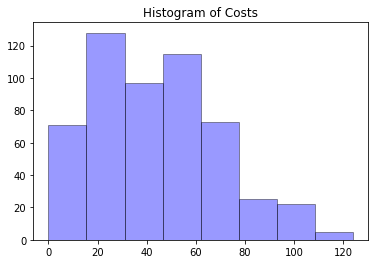

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

range_c = max(all_costs)-min(all_costs)  

# seaborn histogram
sns.distplot(all_costs, hist=True, kde=False, 
             bins=int(range_c/15), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Costs')

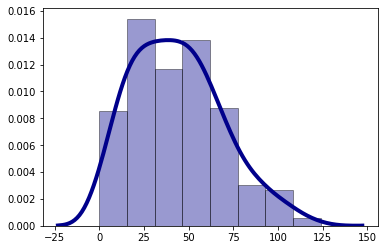

In [82]:
# Density Plot and Histogram of all arrival delays
sns.distplot(all_costs, hist=True, kde=True, 
             bins=int(range_c/15), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})